# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [5]:
#%pip install seaborn
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
from PIL import Image, ImageStat
import numpy as np
import tensorflow as tf
import seaborn as sns

%matplotlib inline

     |████████████████████████████████| 288 kB 5.0 MB/s eta 0:00:01
You should consider upgrading via the '/root/miniconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
dataset = get_dataset("/home/workspace/data/train/*.tfrecord")
#dataset = get_dataset("/home/workspace/data/test/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [8]:
def display_images(batch):
          # color mapping of classes
    colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}

    f, ax = plt.subplots()
    image = batch['image'].numpy()
    ax.imshow(image)
    h, w = image.shape[:2]
    boxes = batch['groundtruth_boxes'].numpy()
    classes = batch['groundtruth_classes'].numpy()

    for cl, bb in zip(classes, boxes):
            y1, x1, y2, x2 = bb
            rec = Rectangle((x1*w, y1*h), (x2 -x1)*w, (y2-y1)*h, facecolor='none', 
                            edgecolor=colormap[cl], linewidth=1)
            ax.add_patch(rec)
            

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

<Figure size 720x720 with 0 Axes>

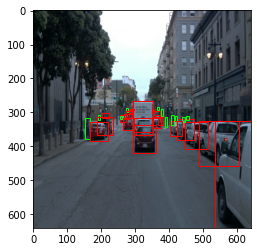

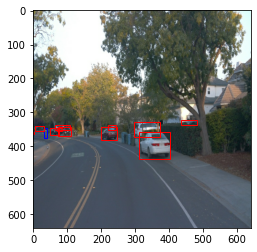

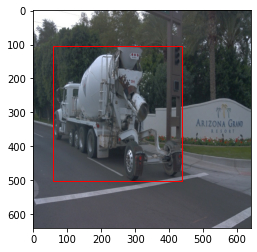

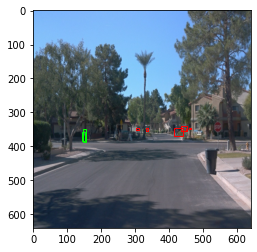

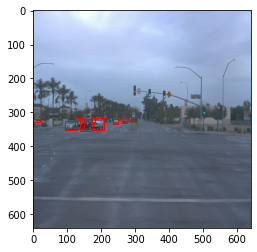

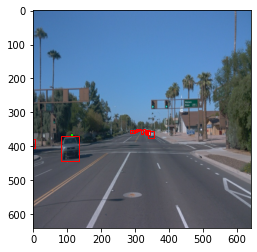

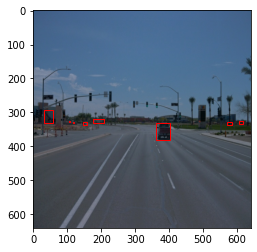

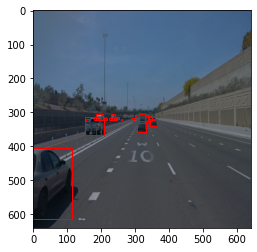

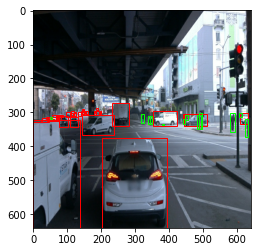

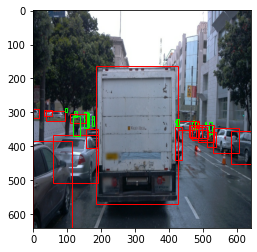

In [11]:
# Display 10 random images in dataset
plt.figure(figsize=(10, 10))
for i in range(10):
    for batch in dataset.shuffle(90).take(1):
        display_images(batch)
plt.show()


## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [9]:

labels = {1: 0, 2 : 0, 4: 0 }
labels_list = {1:[], 2:[], 4:[]}
labels_mean = {1:0, 2:0, 4:0}
labels_std = {1:0, 2:0, 4:0}
numbers_images = 10000
for batches in dataset.take(numbers_images):    
    count = {1: 0, 2 : 0, 4: 0 }
    imgArray = batches['image'].numpy()
    img = Image.fromarray(imgArray, 'RGB')  
    stat = ImageStat.Stat(img)
    for i in batches["groundtruth_classes"].numpy():
        labels[i] += 1
        count[i] += 1
        labels_list[i].append(count[i]) 
        labels_mean[i] = np.array(labels_mean[i])+ (np.array(stat.mean))
        labels_std[i] = np.array(labels_std[i])+ (np.array(stat.var)**0.5)
        
for i in labels_list:  
    labels_mean[i] =  labels_mean[i]/labels[i]
    labels_std[i] =  labels_std[i]/labels[i]
    
print(labels,labels_mean,labels_std)
labels





{1: 172917, 2: 48125, 4: 1258} {1: array([ 89.42462048, 102.53675786, 116.11263577]), 2: array([ 91.44368302, 101.46515039, 111.47183073]), 4: array([ 88.93386699, 102.04929966, 113.84019941])} {1: array([47.80824855, 51.9155618 , 60.75041355]), 2: array([53.88103118, 55.2617375 , 60.00149566]), 4: array([49.7277595 , 53.95381894, 61.62615342])}


{1: 172917, 2: 48125, 4: 1258}

(0.0, 1.0, 0.0, 1.0)

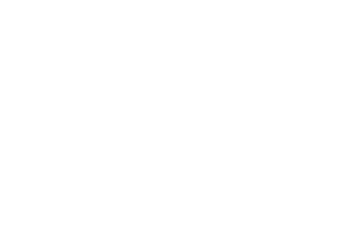

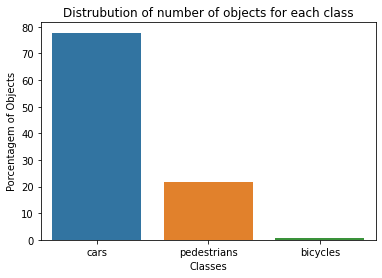

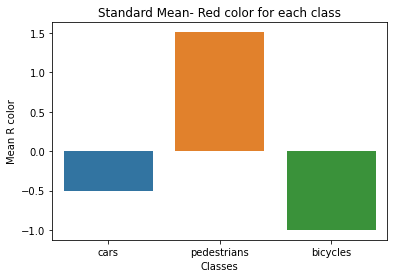

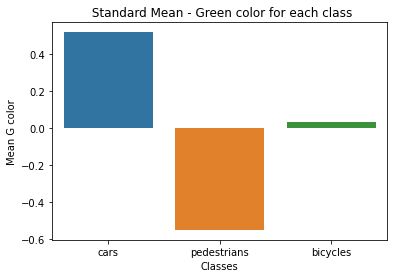

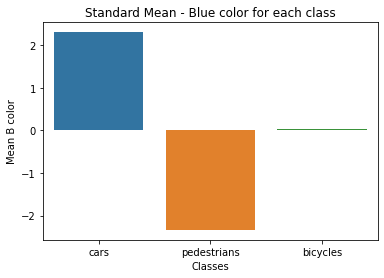

In [12]:
def plot_objects_distribution(labels,labels_mean,labels_std):
    label_class = {"cars": labels[1], "pedestrians": labels[2], "bicycles": labels[4]}
    
    keys = list(label_class.keys())
    val = [label_class[i] for i in keys]
    meanR = [labels_mean[i][0] for i in labels_mean]
    meanG = [labels_mean[i][1] for i in labels_mean]
    meanB = [labels_mean[i][2] for i in labels_mean]
    
    plt.figure()
    ax = sns.barplot(x=keys, y= 100*np.array(val)/(sum(val)))
    ax.set(xlabel='Classes', ylabel='Porcentagem of Objects', title='Distrubution of number of objects for each class') 
    plt.figure()
    ax = sns.barplot(x=keys, y= meanR-np.mean(meanR))
    ax.set(xlabel='Classes', ylabel='Mean R color', title='Standard Mean- Red color for each class')
    plt.figure()
    ax = sns.barplot(x=keys, y= meanG-np.mean(meanG))
    ax.set(xlabel='Classes', ylabel='Mean G color', title=' Standard Mean - Green color for each class')
    plt.figure()
    ax = sns.barplot(x=keys, y= meanB-np.mean(meanB))
    ax.set(xlabel='Classes', ylabel='Mean B color', title='Standard Mean - Blue color for each class')
    plt.show
    
plot_objects_distribution(labels,labels_mean,labels_std) 


